## Armen Khachatrian
### 1st Lab
### CS 663

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#graphs will be included in the notebook

#Import all necessary libraries

In [2]:
df=pd.read_csv("titanic.csv")
df.head() # brief look at the data

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


#### The task: Show the difference in survival rates based on fare paid using a graph

Text(0.5, 1.0, 'Survived vs Fare')

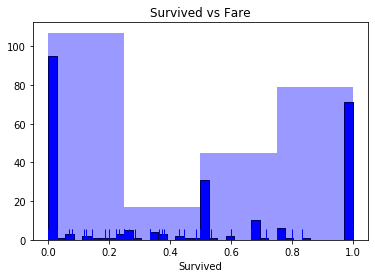

In [3]:
dff = df.groupby(['Fare']).mean() 
plt.hist(dff.Survived, color = 'blue', edgecolor = 'black',
         bins = int(180/5))
sns.distplot(dff.Survived, rug = True, kde=False, color = 'blue', kde_kws={"color": "k", "lw": 3, "label": "KDE"})
plt.title('Survived vs Count') 
# Distribution of survived

In [4]:
dff = dff.reset_index()
dff # after group_by to have not index but column

,Fare,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard
0,0.0000,0.066667,1.933333,31.733333,0.00,0.000000
1,4.0125,0.000000,3.000000,20.000000,0.00,0.000000
2,5.0000,0.000000,1.000000,33.000000,0.00,0.000000
3,6.2375,0.000000,3.000000,61.000000,0.00,0.000000
4,6.4375,0.000000,3.000000,34.500000,0.00,0.000000
...,...,...,...,...,...,...
243,227.5250,0.750000,1.000000,35.750000,0.25,0.000000
244,247.5208,0.500000,1.000000,37.000000,0.00,1.000000
245,262.3750,1.000000,1.000000,19.500000,2.00,2.000000
246,263.0000,0.500000,1.000000,32.500000,2.50,2.500000


### Survived Vs Fare

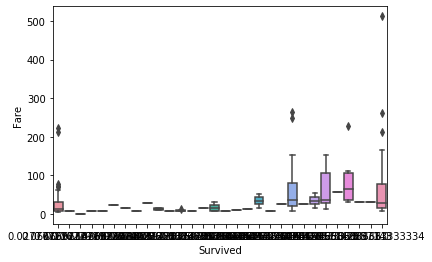

In [5]:
sns.boxplot(x="Survived", y="Fare", data=dff); 

#### Find outliers

In [6]:
Q1 = dff.Fare.quantile(0.25)
Q3 = dff.Fare.quantile(0.75)
IQR = Q3 - Q1
print(IQR) 

42.131274999999995


In [19]:
print((dff.Fare < (Q1 - 1.5 * IQR)) |(dff.Fare > (Q3 + 1.5 * IQR)))

0      False
1      False
2      False
3      False
4      False
       ...  
243     True
244     True
245     True
246     True
247     True
Name: Fare, Length: 248, dtype: bool


In [30]:
dff_out = dff.Fare[~((dff.Fare < (Q1 - 1.5 * IQR))) |((dff.Fare > (Q3 + 1.5 * IQR))).any()]
dff_out.shape

(248,)

In [31]:
dff_out

0        0.0000
1        4.0125
2        5.0000
3        6.2375
4        6.4375
         ...   
243    227.5250
244    247.5208
245    262.3750
246    263.0000
247    512.3292
Name: Fare, Length: 248, dtype: float64